In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import os

from sklearn.datasets import load_sample_image

import keras 
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
# Load MNIST dataset

from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784', version=1, parser='auto')

print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [18]:
X_all, y_all = mnist['data'].to_numpy(), mnist['target'].to_numpy()

X_all.reshape((70000, 28, 28))
y_all.reshape((70000, 1))

array([['5'],
       ['0'],
       ['4'],
       ...,
       ['4'],
       ['5'],
       ['6']], dtype=object)

(70000, 784)

In [9]:
y_all_i = np.ndarray(shape=y_all.shape)
for i in range(70000):
    y_all_i[i]=int(y_all[i])

# Training data
X_train=X_all[:1000]
y_train=y_all[:1000]

# Must normalize pixels or neural net wont work propertly
X_train = X_train.astype('float32') /255

# Test data
X_test=X_all[1000:]
y_test=y_all[1000:]
y_test_i=y_all_i[1000:]

# Must normalize pixels or neural net wont work propertly
X_test = X_test.astype('float32') /255

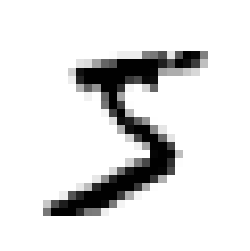

In [11]:

some_digit=X_all[0]
some_digit_image=some_digit.reshape(28, 28)

plt.figure(figsize=(3,3))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10)
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\korisnik\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)
